임포트할 거 임포트

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

train 데이터 전처리

In [2]:
# train 데이터 가져오기
train = pd.read_csv("data/train_titanic.csv", index_col = "PassengerId")
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Name                 891 non-null    object 
 3   Sex                  891 non-null    object 
 4   Age                  714 non-null    float64
 5   SibSp                891 non-null    int64  
 6   Parch                891 non-null    int64  
 7   Ticket               891 non-null    object 
 8   Fare                 891 non-null    float64
 9   Cabin                204 non-null    object 
 10  Embarked             889 non-null    object 
 11  Survived(Status)     891 non-null    object 
 12  Pclass(Status)       891 non-null    object 
 13  Embarked(Status)     889 non-null    object 
 14  Embarked(C)          891 non-null    bool   
 15  Embarked(S)          891 non-null    boo

<AxesSubplot:xlabel='Sex', ylabel='count'>

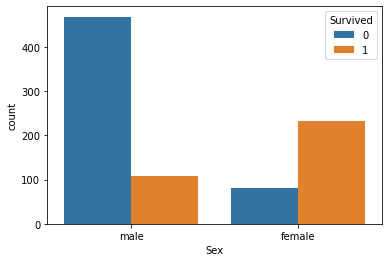

In [3]:
# 성별 가져와서 생존여부 확인(groupby로 시각화)
train['Sex'].groupby(train['Survived']).value_counts()
# train['Sex'].value_counts()
sns.countplot(data = train, x='Sex', hue = 'Survived')
# 괄호 안에서 data를 제일 먼저 써줘야됨

In [4]:
# Sex_encode 칼럼 만들고 남자 0, 여자 1로 지정
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1
# male, female 문자열임! 주의할 것

# 확인
train["Sex_encode"]

PassengerId
1      0.0
2      1.0
3      1.0
4      1.0
5      0.0
      ... 
887    0.0
888    1.0
889    1.0
890    0.0
891    0.0
Name: Sex_encode, Length: 891, dtype: float64

test 데이터 전처리

In [5]:
# test 파일 불러오기
test = pd.read_csv("data/test_titanic.csv", index_col = "PassengerId")
# 새로운 칼럼 Sex_encode 만들고 남자 0, 여자 1 주기
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1
# 확인
test["Sex_encode"]

PassengerId
892     0.0
893     1.0
894     0.0
895     0.0
896     1.0
       ... 
1305    0.0
1306    1.0
1307    0.0
1308    0.0
1309    0.0
Name: Sex_encode, Length: 418, dtype: float64

결정tree 사용

In [6]:
# train, test 데이터 나누기

# --X_train--
# Pclass 나눠주기, 성별, 혼인여부, 가족 사이즈 칼럼으로 주기
# X_train에 정리한 거 넣어주기
feature_names = ["Pclass(F)", "Pclass(B)", "Pclass(E)", "Sex_encode", "Single", "FamilySize"]

X_train = train[feature_names]
# 위에 데이터프레임에 넣겠다한 컬럼들을 다 표에 넣어버림 -> 그걸 다시 X_train에 넣어줌

# --y_train--
# 생존여부 넣어주기
y_train = train["Survived"]
# 구체적으로는 칼럼명 주고 Y_train에 넣어주기

In [7]:
# feature_names = \
#     ['Pclass(F)', 'Pclass(B)', 'Pclass(E)', # 좌석 등급
#     'Sex_encode', # 남성인지 여성인지 정한 코드
#     'Single', # 혼자인지
#     'FamilySize'] # 가족이 몇명인지

# feature_names

train 데이터로 모델 score 뽑아보기

In [8]:
# 임포트할 거 임포트
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# 의사결정 tree 객체 생성
dt = DecisionTreeClassifier(random_state=42)
# 학습시키기
dt.fit(X_train, y_train)

# score 뽑아보기
dt.score(X_train, y_train)

0.813692480359147

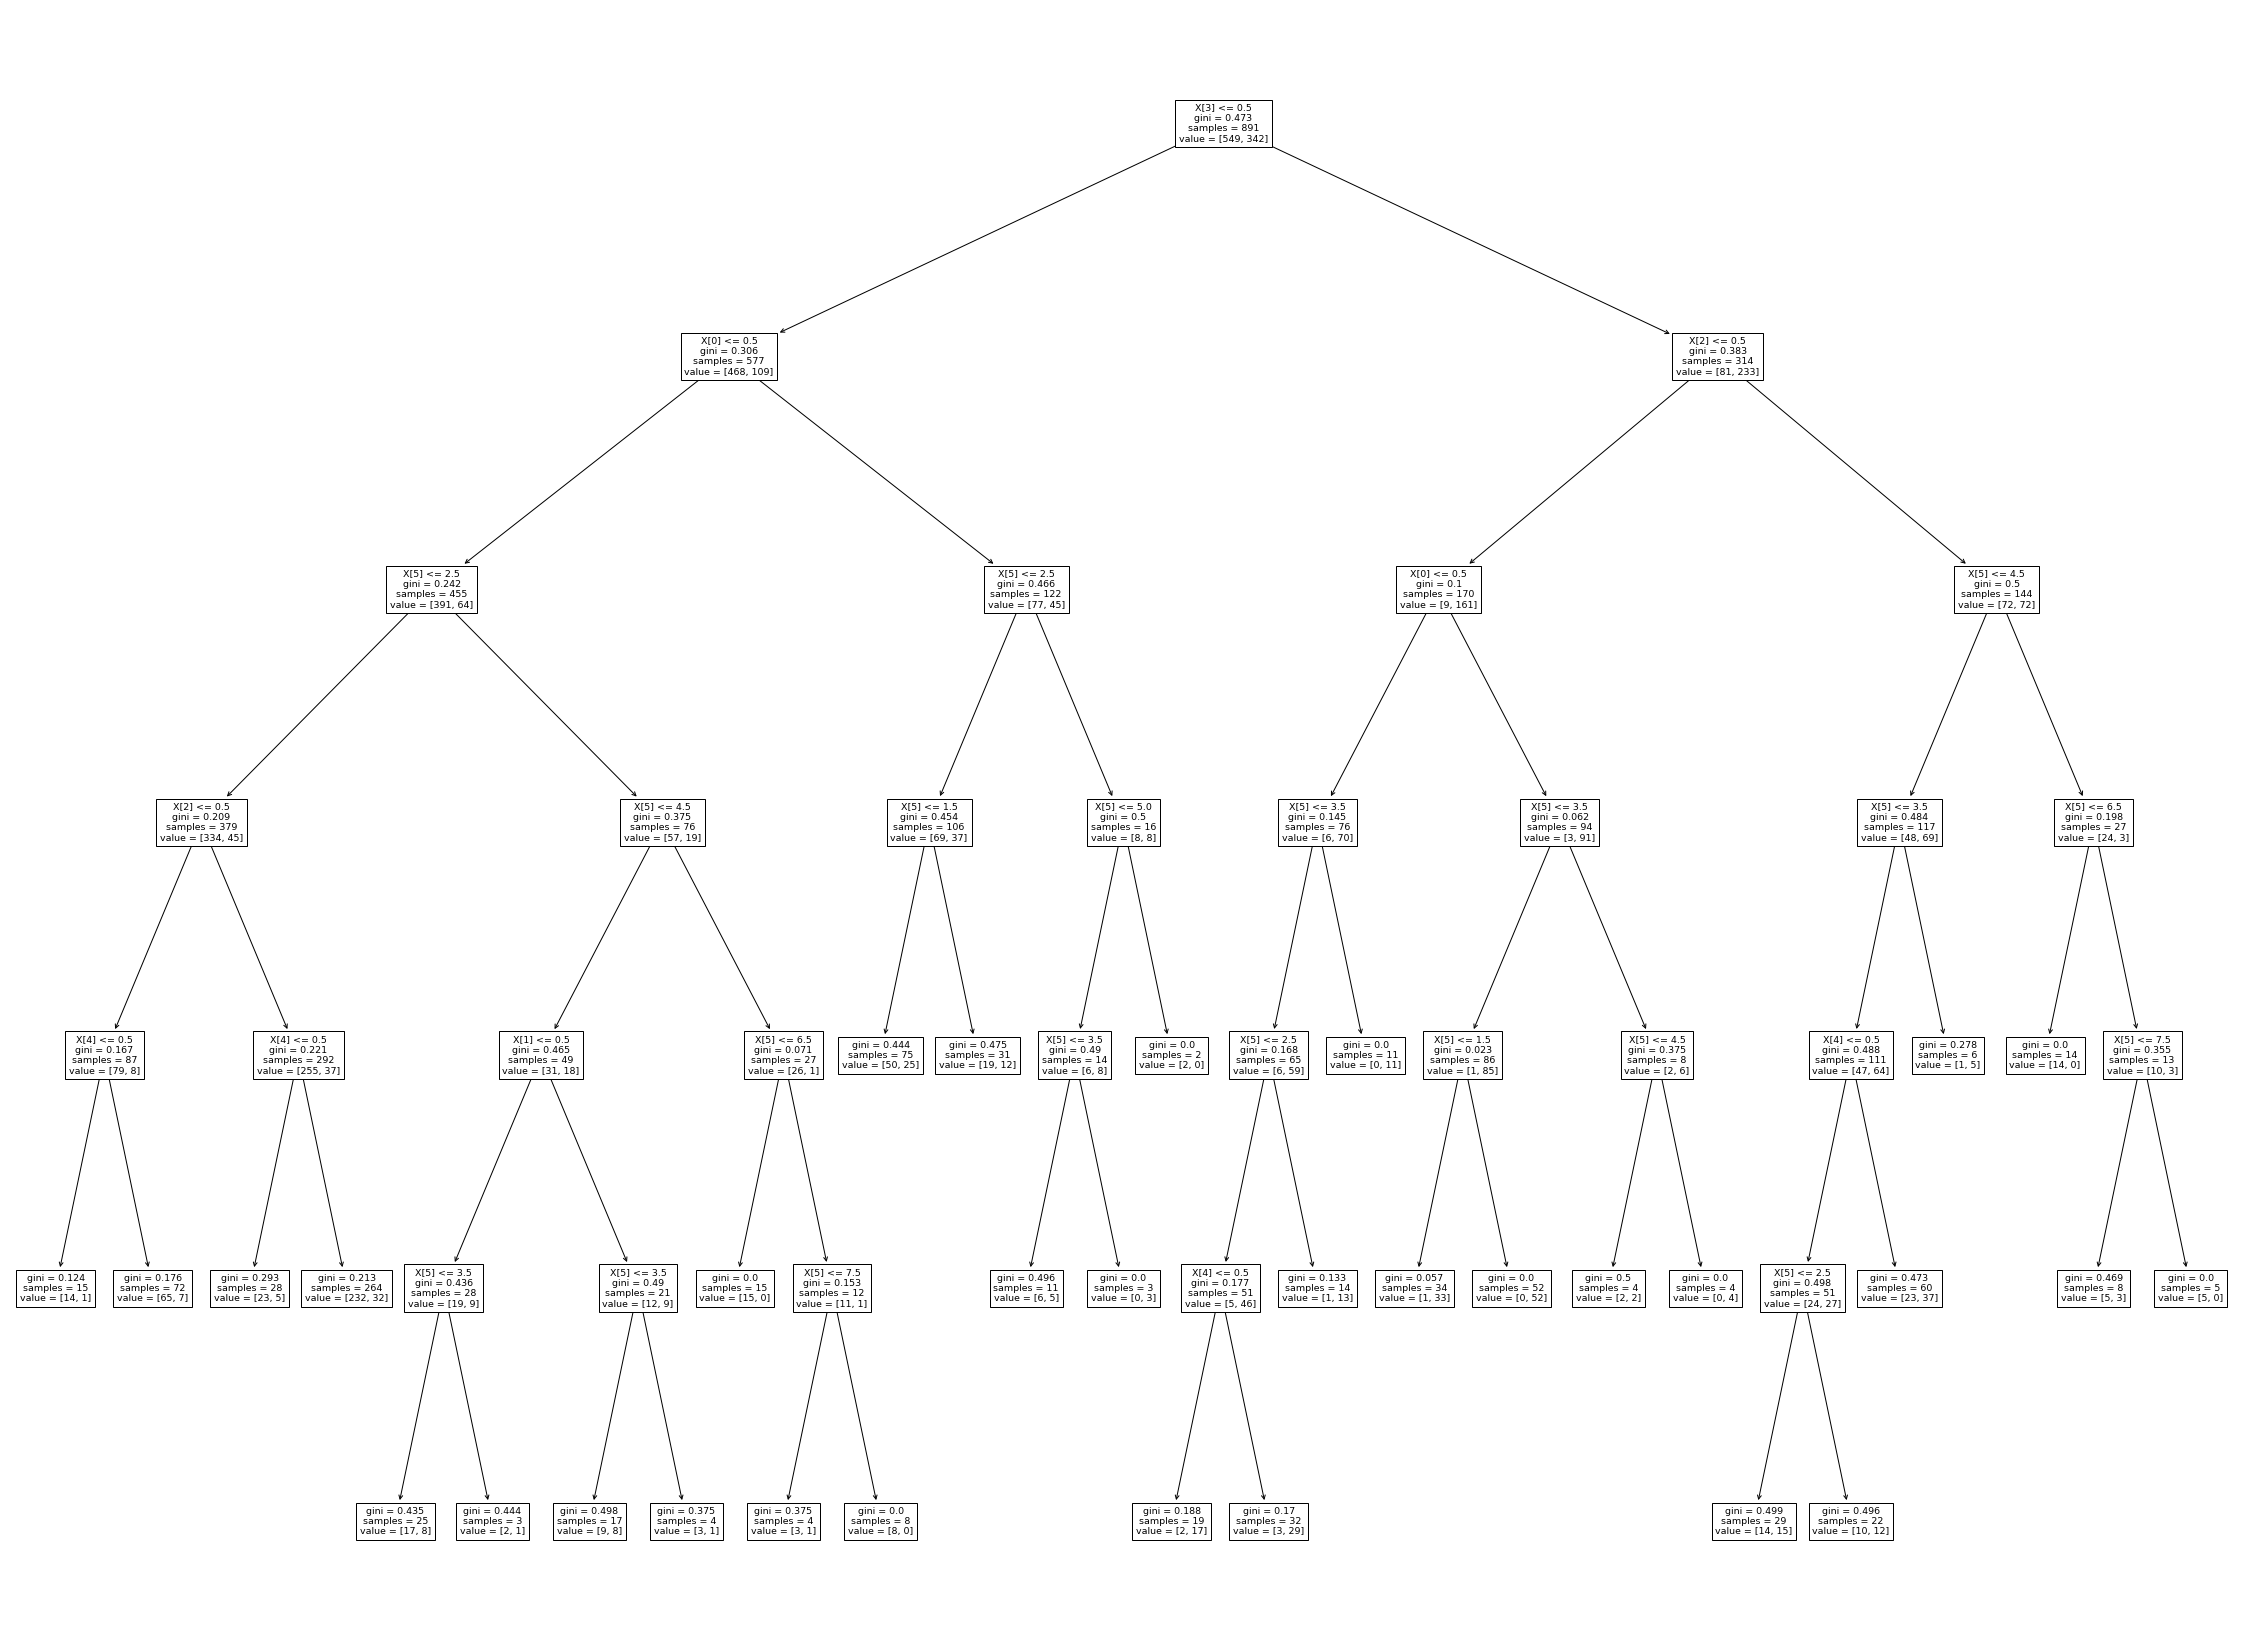

In [9]:
# plot_tree 시각화
# 임포트
from sklearn.tree import plot_tree

# fig 사이즈 지정
plt.figure(figsize = (40,30))

# 함수에 넣어주기
plot_tree(dt)

# 그림 그리기
plt.show()

max_depth 조정, 그림 확인

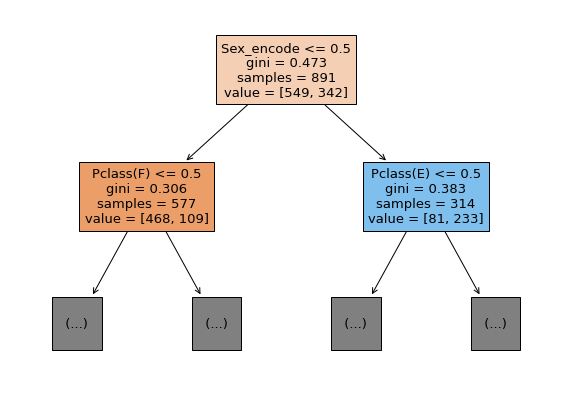

0.813692480359147


In [10]:
# max_depth = 1
# 그림 사이즈 지정
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth = 1, filled = True, feature_names = ['Pclass(F)', 'Pclass(B)', 'Pclass(E)', 'Sex_encode', 'Single', 'FamilySize'] )
# filled 는 (양성/음성) 클래스에 맞춰 색을 칠하라는 거에 관련됨 (양성에 가까울수록 진한 파란색)
plt.show()

print(dt.score(X_train, y_train))

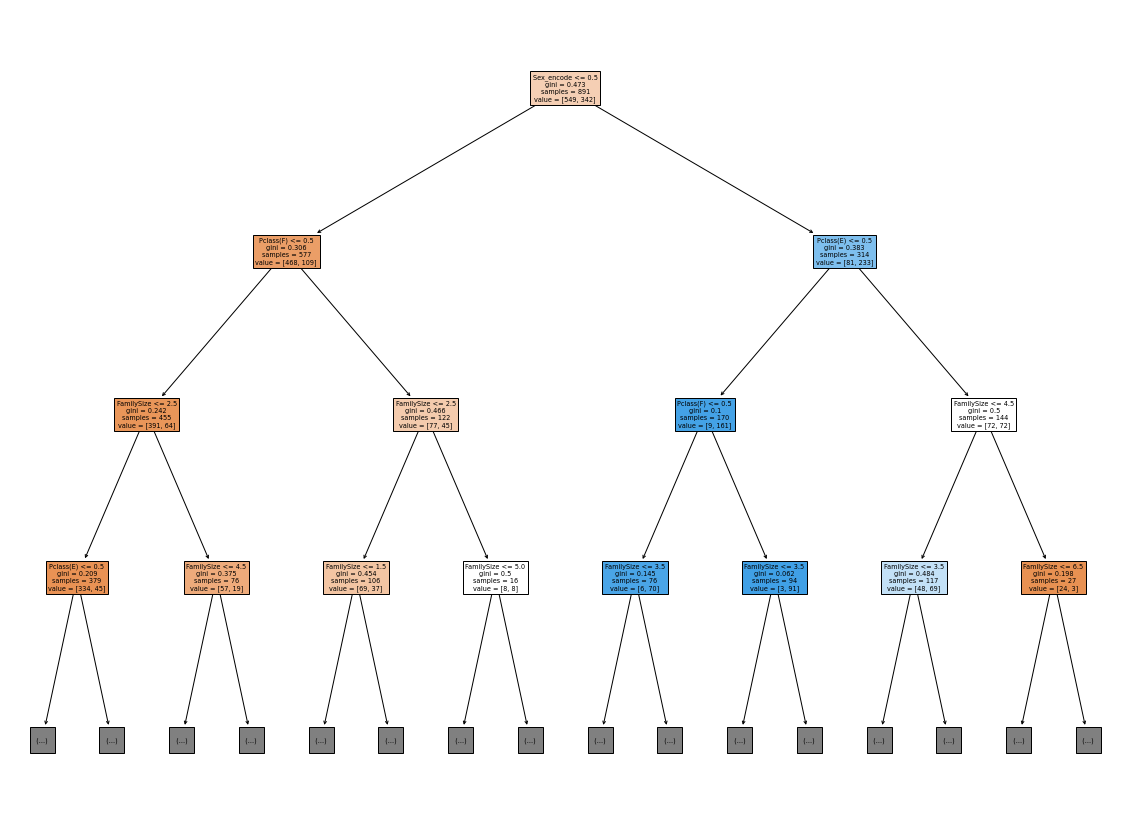

0.813692480359147


In [11]:
# max_depth = 3
plt.figure(figsize = (20,15))
plot_tree(dt, max_depth = 3, filled = True, feature_names = ['Pclass(F)', 'Pclass(B)', 'Pclass(E)', 'Sex_encode', 'Single', 'FamilySize']) 
plt.show()

print(dt.score(X_train, y_train))

gini 불순도 최소값으로 지정, 가지 치는 방식 확인

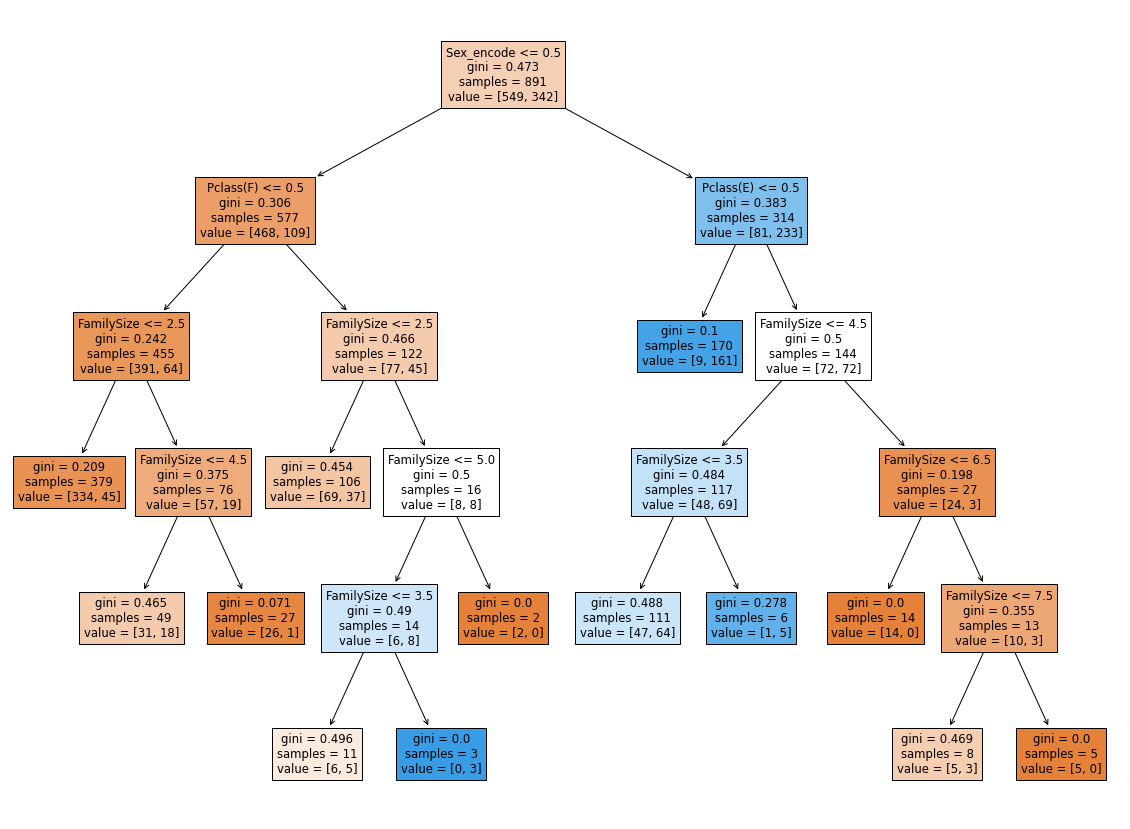

0.813692480359147


In [12]:
# 의사결정트리 분류기 import
from sklearn.tree import DecisionTreeClassifier

# 의사결정 Classifier 함수로 객체 생성, 그 안에 지니계수 지정.
dt = DecisionTreeClassifier(min_impurity_decrease = 0.0005, random_state=42)
# train 데이터 학습시키고 fig size 20,15로 지정, feature_names 각각 지정해서 각 노드에 내용 표시되게
dt.fit(X_train, y_train)
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names = ['Pclass(F)', 'Pclass(B)', 'Pclass(E)', 'Sex_encode', 'Single', 'FamilySize'])
plt.show()

print(dt.score(X_train, y_train))

깊이(max_depth)도 추가해서 트리 그려보기

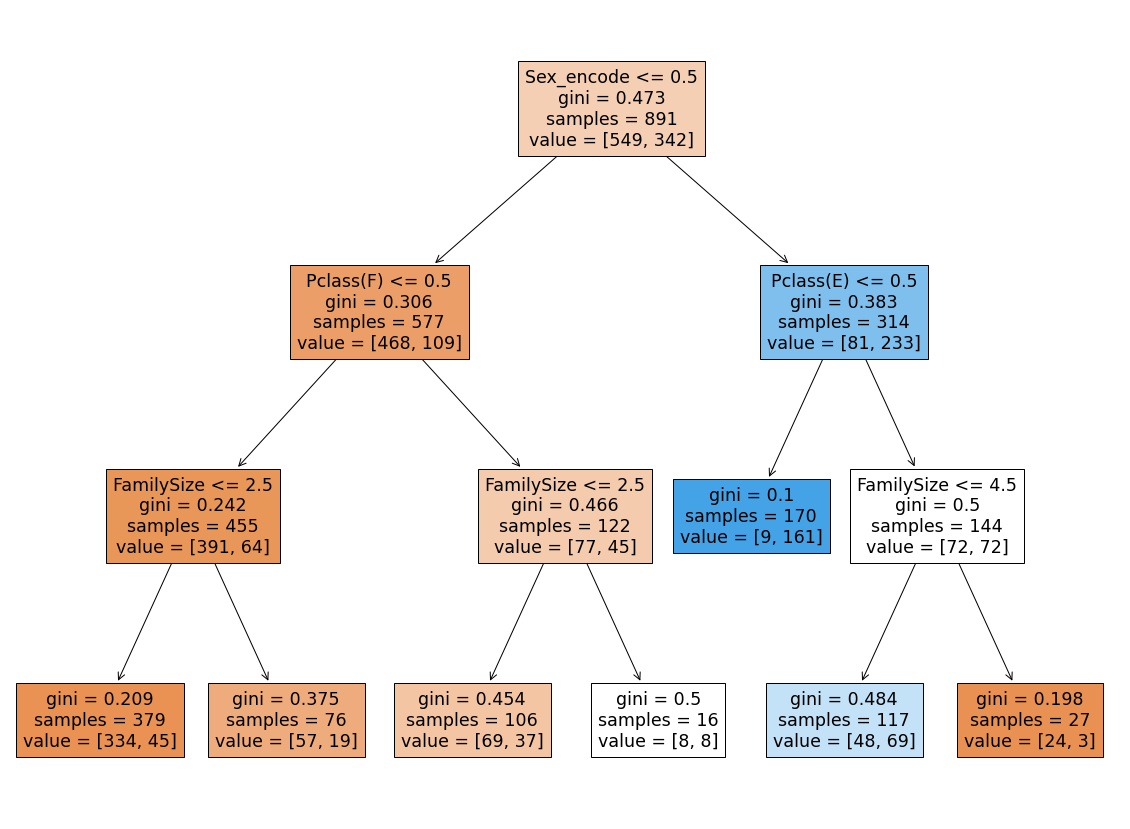

0.8103254769921436


In [13]:
# 의사결정트리 분류기 import
from sklearn.tree import DecisionTreeClassifier

# 의사결정 Classifier 함수로 객체 생성, 그 안에 지니계수 지정.
dt = DecisionTreeClassifier(max_depth = 3, min_impurity_decrease = 0.0005, random_state=42)
# train 데이터 학습시키고 fig size 20,15로 지정, feature_names 각각 지정해서 각 노드에 내용 표시되게
dt.fit(X_train, y_train)
plt.figure(figsize = (20,15))
plot_tree(dt, filled = True, feature_names = ['Pclass(F)', 'Pclass(B)', 'Pclass(E)', 'Sex_encode', 'Single', 'FamilySize'])
plt.show()

print(dt.score(X_train, y_train))

차이 분석

In [14]:
# 지니계수 지정x score = 지니계수 지정(o) + max_depth(o) != 지니계수 지정o

# 엥?

In [15]:
# 지니계수 지정은 무슨 의미?
# -- 지니계수 낮을수록 데이터 균일도 높은 것으로 해석, 낮은 속성 기준으로 분할